# 파일 불러오기

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")
df
df.columns

Index(['Unnamed: 0', 'Gender', 'Shift', 'Injury Location', 'Age_grouping',
       'scaled_DaysLost', 'scaled_IncidentCost', 'Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle'],
      dtype='object')

# 전처리

In [2]:
from sklearn.model_selection import train_test_split

X=df[['scaled_DaysLost', 'Shift','Gender','Incident Type_Burn',
       'Incident Type_Crush & Pinch', 'Incident Type_Cut',
       'Incident Type_Equipment', 'Incident Type_Fall',
       'Incident Type_Falling object', 'Incident Type_Lifting',
       'Incident Type_Slip/trip', 'Incident Type_Vehicle']].astype(float)
Y = df[[ 'Injury Location']].astype(float)
Y=np.ravel(Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state =1)
X

,scaled_DaysLost,Shift,Gender,Incident Type_Burn,Incident Type_Crush & Pinch,Incident Type_Cut,Incident Type_Equipment,Incident Type_Fall,Incident Type_Falling object,Incident Type_Lifting,Incident Type_Slip/trip,Incident Type_Vehicle
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
468,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
469,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 모델링

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier (n_neighbors = 168) # train 개수

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy: ', accuracy_score(y_test,y_pred))

Accuracy:  0.3157894736842105


https://jimmy-ai.tistory.com/39 (최적 k 구하기)

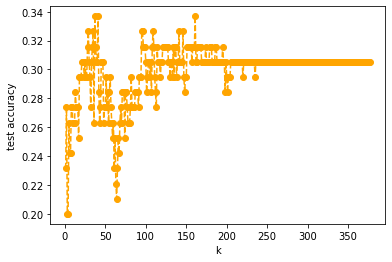

In [4]:
import matplotlib.pyplot as plt

k_range = range(1,378)

# k에따른 accuracy 저장
accuracy_list = []

# 각 k마다 모델 테스트
for k in k_range:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    
# 시각화
plt.plot(k_range, accuracy_list, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("test accuracy")
plt.show()


# 교차검증

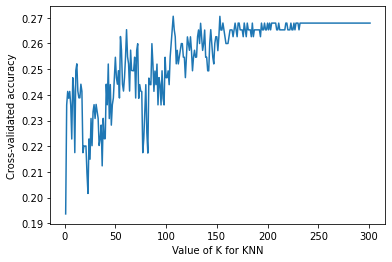

In [5]:
# 교차 검증(cross-validation)을 이용해 k 찾기 : 하이퍼 파라미터 검증 선택

from sklearn.model_selection import cross_val_score
from sklearn import neighbors

k_range = range(1,302)
k_scores = []

for k in k_range: # 데이터를 5개로 나누어 계산 하도록
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring='accuracy') # 5번의 교차 검증
    k_scores.append(scores.mean()) # 평균

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()